In [1]:
# finding scilence in the sudio file and trimming 
from scipy.io import wavfile
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io

from tqdm.autonotebook import tqdm
%matplotlib inline


C:\Users\rojit\anaconda3\lib\site-packages\ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys


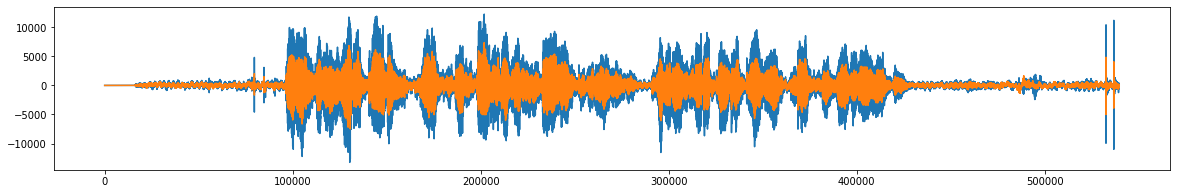

In [2]:
#plot of the audio file
ra, data = wavfile.read("C:/Users/rojit/Desktop/TCS, Assignments/scilence detection/Ip_audio.wav") 
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [17]:
#sound is a pydub.AudioSegment
#silence_threshold in dB
#chunk_size in ms
# we iterate over chunks until you find the first one with sound

from pydub import AudioSegment

def detect_leading_silence(sound, silence_threshold=-26.0,  chunk_size=10): 
    
    trim_ms = 0 # ms

    assert chunk_size > 0 # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size
    

    return trim_ms

sound = AudioSegment.from_file("C:/Users/rojit/Desktop/TCS, Assignments/scilence detection/Ip_audio.wav", format="wav")


start_trim = detect_leading_silence(sound)
end_trim = detect_leading_silence(sound.reverse())

duration = len(sound)    
trimmed_sound = sound[start_trim:duration-end_trim].export("C:/Users/rojit/Desktop/TCS, Assignments/scilence detection/Op_audio.wav", format="wav")

